In [2]:
# This loads numerous packages and defines functions I used in these notes
%run -i 'controls_imports.py'

# Mathematical Models of Systems

1. Define the system and its components.
2. Formulate the mathematical model and fundamental necessary assumptions based on basic principles.
3. Obtain the differential equations representing the mathematical model.
4. Solve the equations for the desired output variables.
5. Examine the solutions and the assumptions.
6. If necessary, reanalyze or redesign the system.

## Differential equations of physical systems

Consider a tortional spring. 

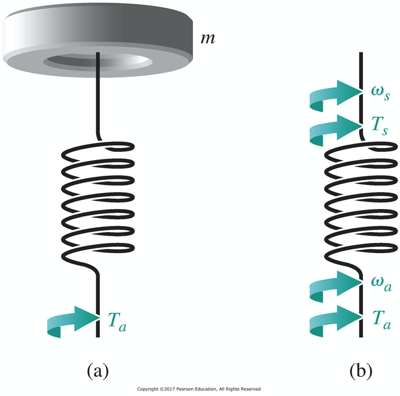

The torque at each end must be the same. So, we can consider that it travelled through the spring, and we call it a *through variable*. 

The twist at each and, $\theta$, is different across the spring. So, we call it an *across variable*.

System | Variable Through Element | Integrated Through Variable | Variable Across Element | Integrated Across Element
-------|--------------------------|-----------------------------|-------------------------|---------------------------------
Electrical | Current, $i$| Charge, $q$| Voltage difference, $v_{21}$| Flux linkage, $\lambda_{21}$
Mechanical translational| Force $F$ | Translational momentum, $P$|Velocity Difference, $v_{21}$| Displacement difference, $y_{21}$
Mechanical rotational|Torque, $T$|Angular Momentum, $h$|Angular Velocity Difference, $\omega_{21}$|Angular displacement difference $\theta_{21}$
Fluid |  Fluid volumetric rate of flow, $Q$| Volume, $V$| Pressure difference $P_{21}$| Pressure momentum $\gamma_{21}$



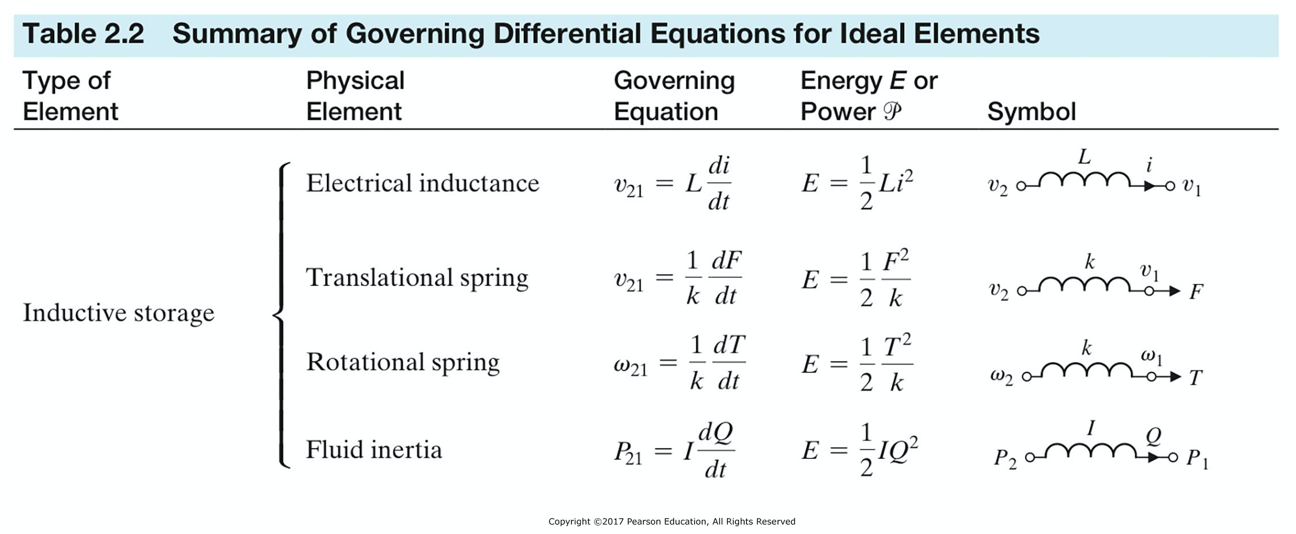

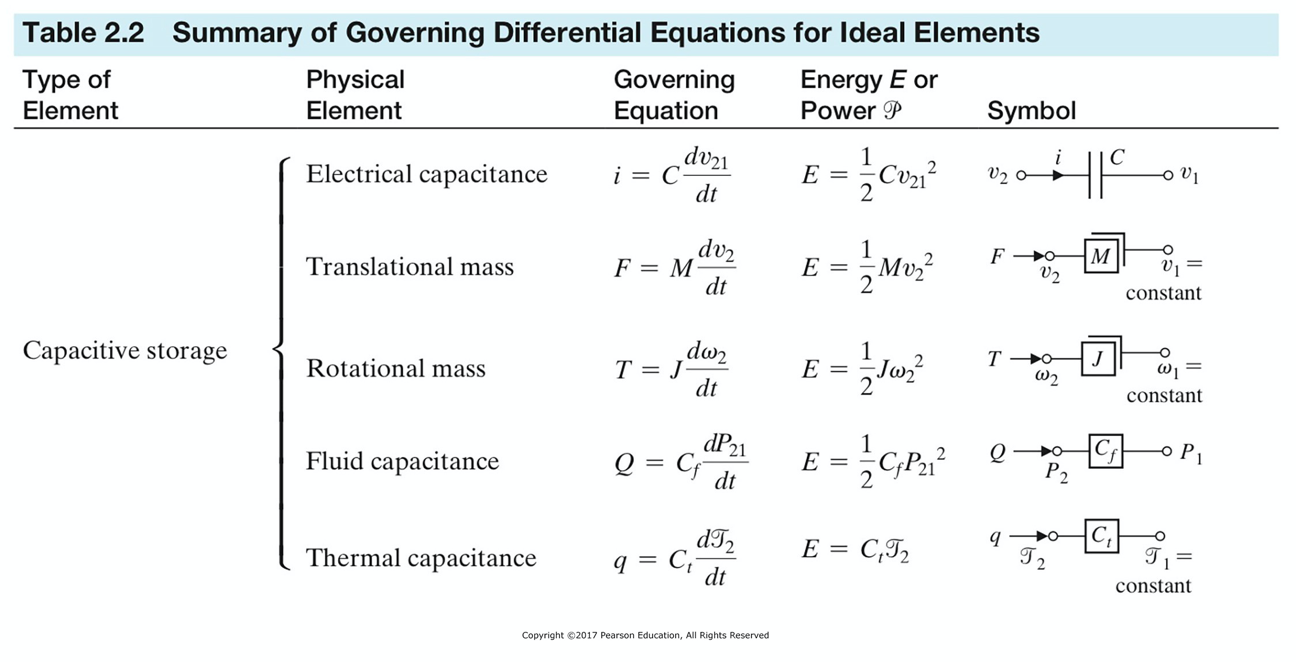

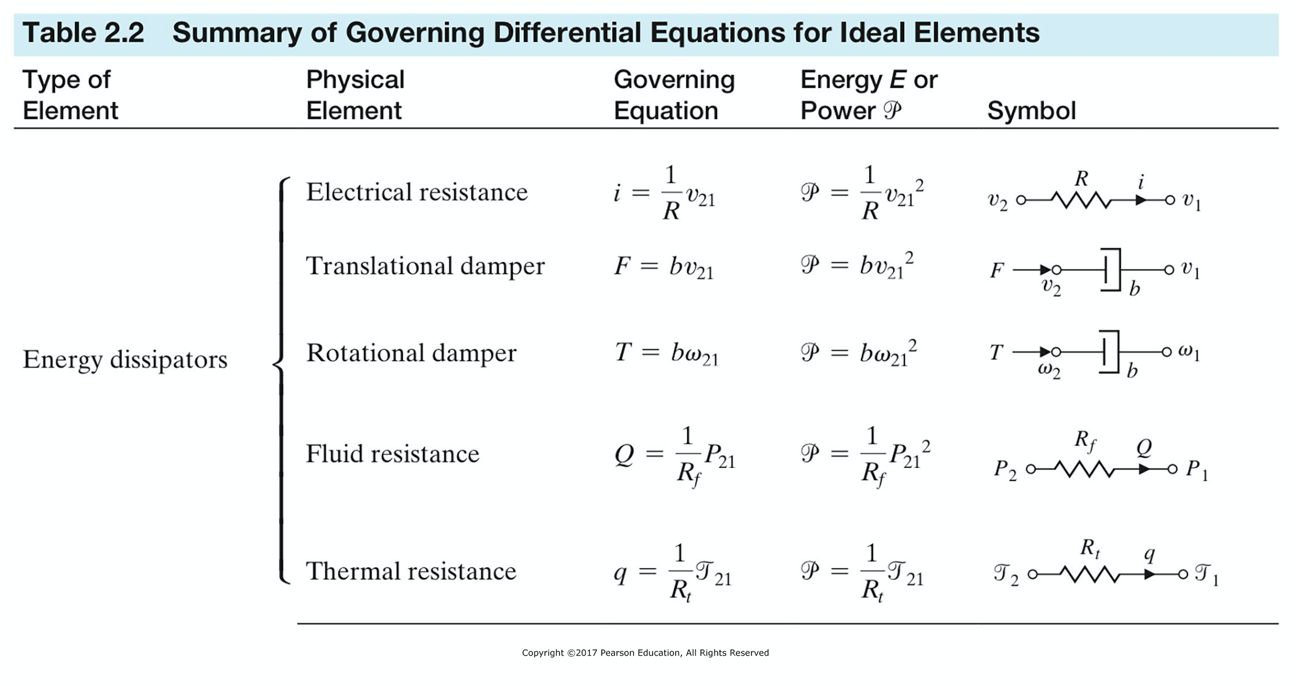

Definitions:

Don't fret about them. Analogies can be taken way to far in comparing Mechanical and Electrical systems. 

In my assessment, more important in relating components is what they physically do:

 

Physics | Static Storage | Dissipation | Kinetic Storage
    --|--|--|--
Electrical| Capacitor | Resistor | Inductor
Translational| Spring | Dashpot/damper | Mass
Rotational| Spring |Dashot | Inertia
Fluid| Fluid capacitance | Fluid resistance | Fluid inertia
Thermal| Thermal capacitance | Thermal resistance | None

Notes: 
1. Thermal resistance does behaves like a resistance mathematically, but energy isn't converted to something else. 
2. Dissipation changes the energy form to heat or sound in most cases

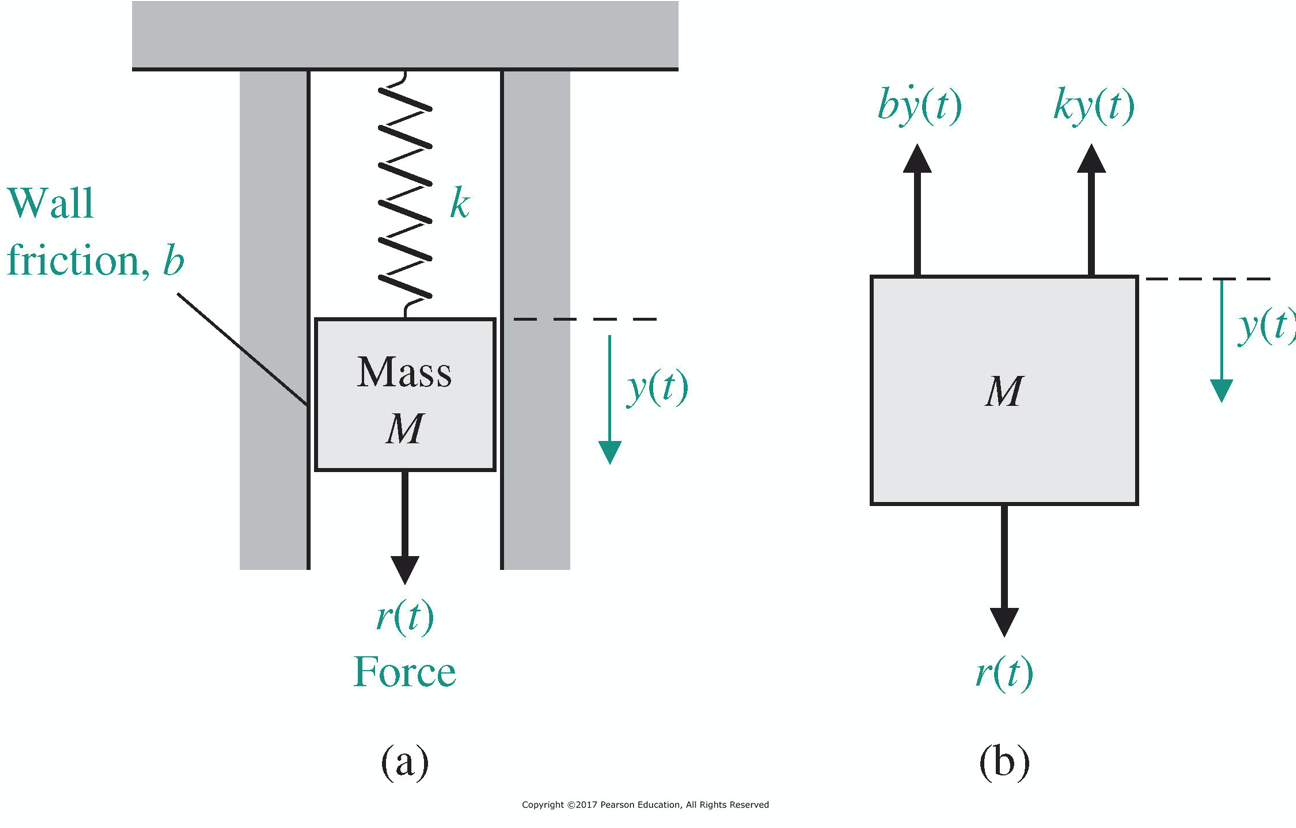

$M \frac{d^{2} y(t)}{d t^{2}}+b \frac{d y(t)}{d t}+k y(t)=r(t)$

(let's not talk about gravity- it's not a dynamic effect, and this is more conceptual/illustration than real)

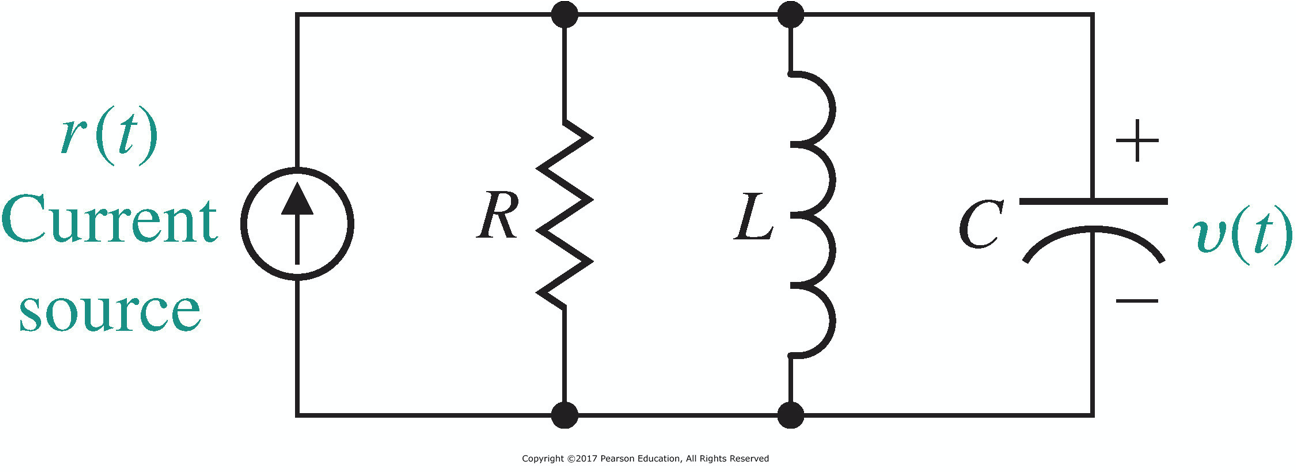

$\frac{v(t)}{R}+C \frac{d v(t)}{d t}+\frac{1}{L} \int_{0}^{t} v(t) d t=r(t)$

Consider using velocity for the mechanical system instead of displacement:

$M \frac{d v(t)}{d t}+b v(t)+k \int_0^t v(t) dt=r(t)$

Reordering:

$b v(t)+M \frac{d v(t)}{d t}+k \int_0^t v(t) dt=r(t)$

compared to the circuit equation:

$\frac{1}{R}v(t)+C \frac{d v(t)}{d t}+\frac{1}{L} \int_{0}^{t} v(t) d t=r(t)$

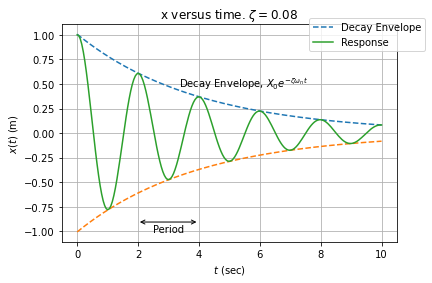

In [3]:
sdof_resp(x0=1, v0=0.1, m=1, c=0.5, k=10, tmax=10)

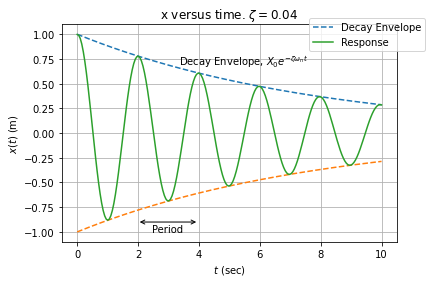

<function __main__.sdof_resp(x0=1, v0=0.1, m=1, c=0.25, k=10, tmax=10)>

In [4]:
# Note: This interactive portion works in jupyter notebook, not jupyter lab

# Execute: jupyter nbextension enable --py widgetsnbextension
# From your conda terminal once to install this extension

interact(sdof_resp, x0 = (0,2,0.1), v0 = (0,2,.1), m = (0,2,0.1), k = (0,100,1), c = (-1,5,.1))

## Linear approximations of physical systems

We use linear models not because they are right, but because they are (usually- be warned!) good enough.

The end objective of a model is to make design decisions. A model that is more complex than necessary, even if more accurate, is unhelpful. 

**sometimes a nonlinear model is necessary**. This takes experience and judgment to determine. 

### Linearity
A system is linear if it satisfies superposition and homogeneity

#### Superposition
Consider a system subject to an arbitrary input $x_1(t)$ resulting in an output $y_1(t)$. When it is subject to another arbitrary input $x_2(t)$, the output is $y_2(t)$. The system satisfies *supoerposition* if an input of $x_1(t)+x_2(t)$ results in an output $y_1(t)+y_2(t)$.

#### Homogeneity
Consider a system subject to an arbitrary input $x(t)$ with output $y(t)$. If $x(t)$ is scaled by a constant, say $\beta$, then the output resulting from $\beta x(t)$ must be $\beta y(t)$

### Linearizing models

If the system model can be represented by a smooth function (no jumps), we can use a Taylor series to approximate its behavior around a small region. 

Consider

$y(t)=g(x(t))$

We can linearize this about a point $x_0$:

$y(t)=g(x(t))=g\left(x_{0}\right)+\left.\frac{d g}{d x}\right|_{x(t)=x_{0}} \frac{\left(x(t)-x_{0}\right)}{1 !}+\left.\frac{d^{2} g}{d x^{2}}\right|_{x(t)=x_{0}} \frac{\left(x(t)-x_{0}\right)^{2}}{2 !}+\cdots$

An approximate model is given by 

$y(t)=g\left(x_{0}\right)+\left.\frac{d g}{d x}\right|_{x(t)=x_{0}}\left(x(t)-x_{0}\right)=y_{0}+m\left(x(t)-x_{0}\right)$

or written simply as:

$y(t)-y_{0}=m\left(x(t)-x_{0}\right)$

or even better as:

$\Delta y(t)=m \Delta x(t)$

#### Example:

Consider a mass on a nonlinear spring $f(t) = y^2(t)$ 

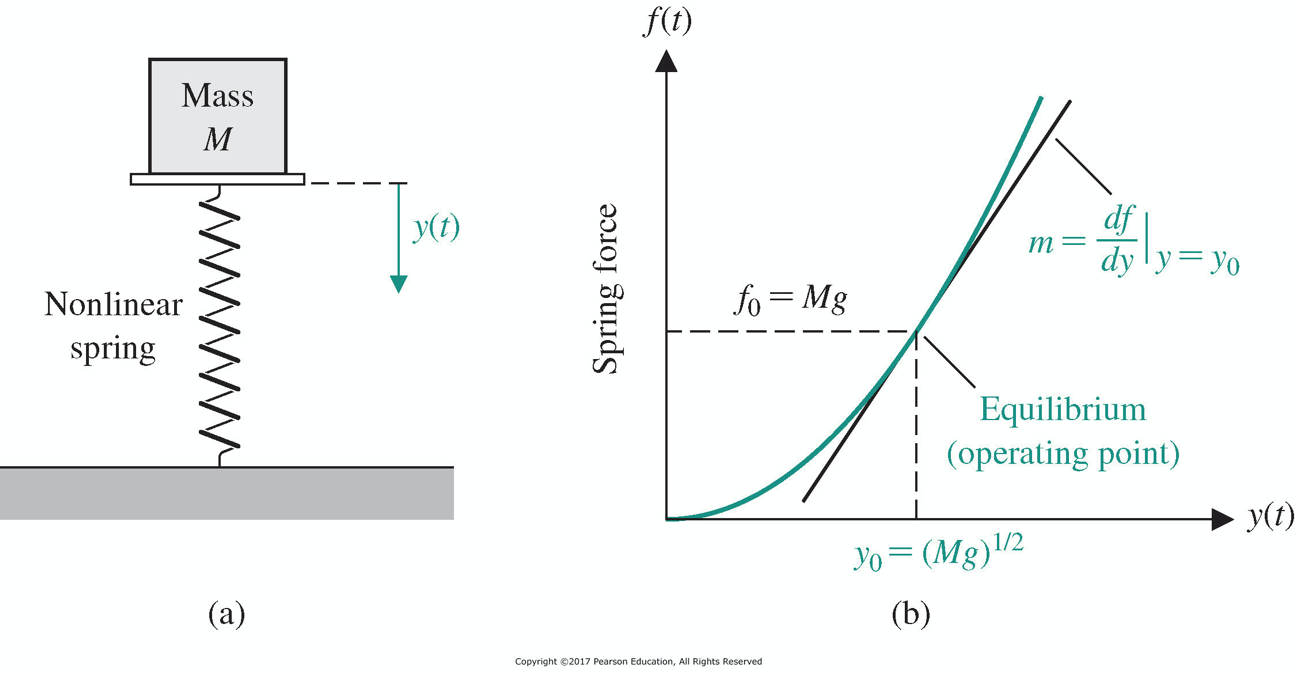

So at equilibrium $M g = y^2(t)$, $y_0=\sqrt{Mg}$

The slope at that point is 

$\frac{d f(y)}{dy}_{y=y_0} =\frac{d f(y^2}{dy}_{y=y_0} = 2 y_0$

So, a linear model in the vicinity of equilibrium is

$M\frac{d^2y}{t^2} + (2 y_0) y = 0$

Note: the text uses $y$ for both outputs of systems and displacements. I would have used $x$ in this example

When the output $y(t)$ depends on multiple inputs 

$y(t)=g\left(x_{1}(t), x_{2}(t), \ldots, x_{n}(t)\right)$

we can do a multi-dimensional Taylor series:

$\begin{aligned} y(t)=& g\left(x_{1}, x_{2}, \ldots, x_{n_{0}}\right)+\left.\frac{\partial g}{\partial x_{1}}\right|_{x(t)=x_{0}}\left(x_{1}(t)-x_{1_{0}}\right)+\left.\frac{\partial g}{\partial x_{2}}\right|_{x(t)=x_{0}}\left(x_{2}(t)-x_{2_{0}}\right) \\ &+\cdots+\left.\frac{\partial g}{\partial x_{n}}\right|_{x(t)=x_{0}}\left(x_{n}(t)-x_{n_{0}}\right) \end{aligned}$

#### Example: Pendulum oscillator

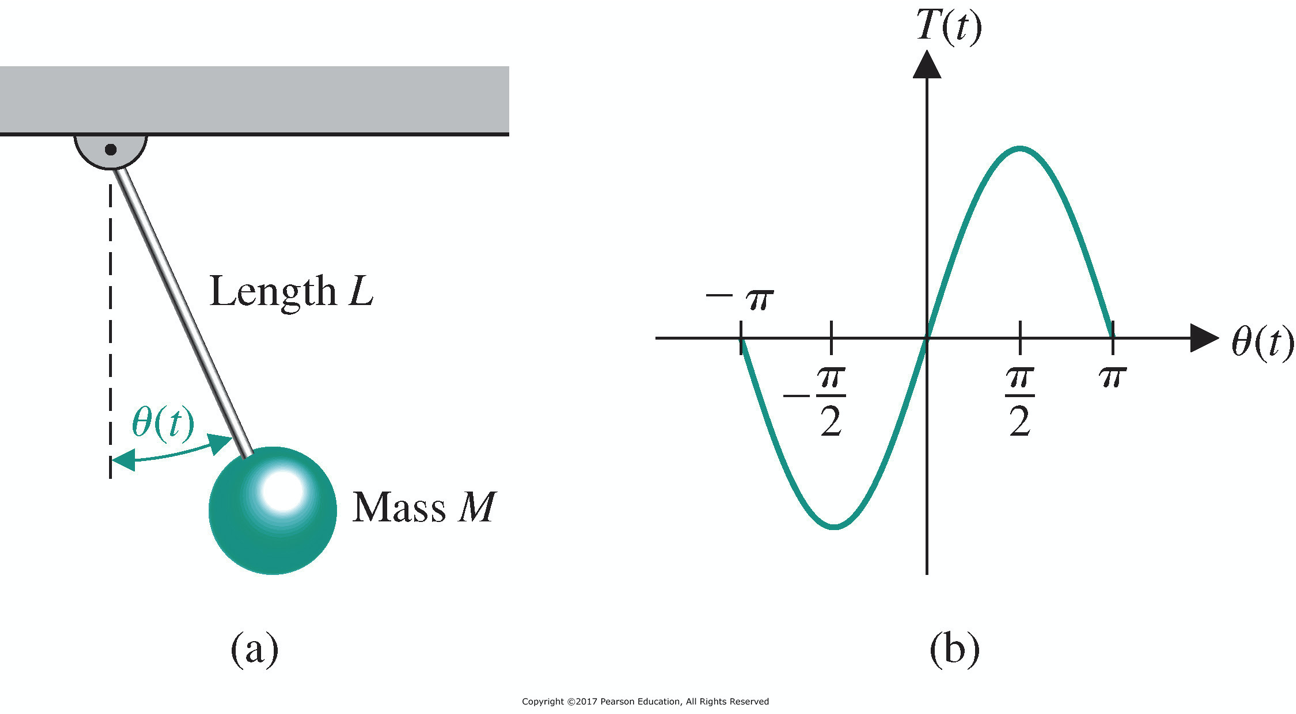

The torque on the mass is 

$T(t)=M g L \sin \theta(t)$

which is approximated by  
 
$T(t)-\left.T_{0} \cong M g L \frac{\partial \sin \theta}{\partial \theta}\right|_{\theta(t)=\theta_{0}}\left(\theta(t)-\theta_{0}\right)$

Since $T_0=0$, $\theta_0=0$, thus

$T(t) = MgL\theta(t)$



## The Laplace Transform

The Laplace Transform can be used to solve differential equations. This is less valuable today with:
1. Solvers readily available
2. Problems so complex, that a closed-form solution loses value

However, it is a tool you must understand as its power is built into most of what is done in control design. It turns linear differential equations into algrbraic equations that can be solved. The inverse Laplace Transform can be applied to yield the answer in the time domain. 

The Laplace Transform exists for a function if:

$$\int_{0^{-}}^{\infty}|f(t)| e^{-\sigma_{1} t} d t<\infty$$

The $0^{-}$ means "include any discontinuity at zero" for instance a step or an impulse.

The Laplace Transform of a function is defined as:

$$
F(s)=\int_{0^{-}}^{\infty} f(t) e^{-s t} d t=\mathscr{L}\{f(t)\}
$$
While the inverse Laplace transform is written as
$$f(t)=\frac{1}{2 \pi j} \int_{\sigma-j \infty}^{\sigma+j \infty} F(s) e^{+s t} d s$$

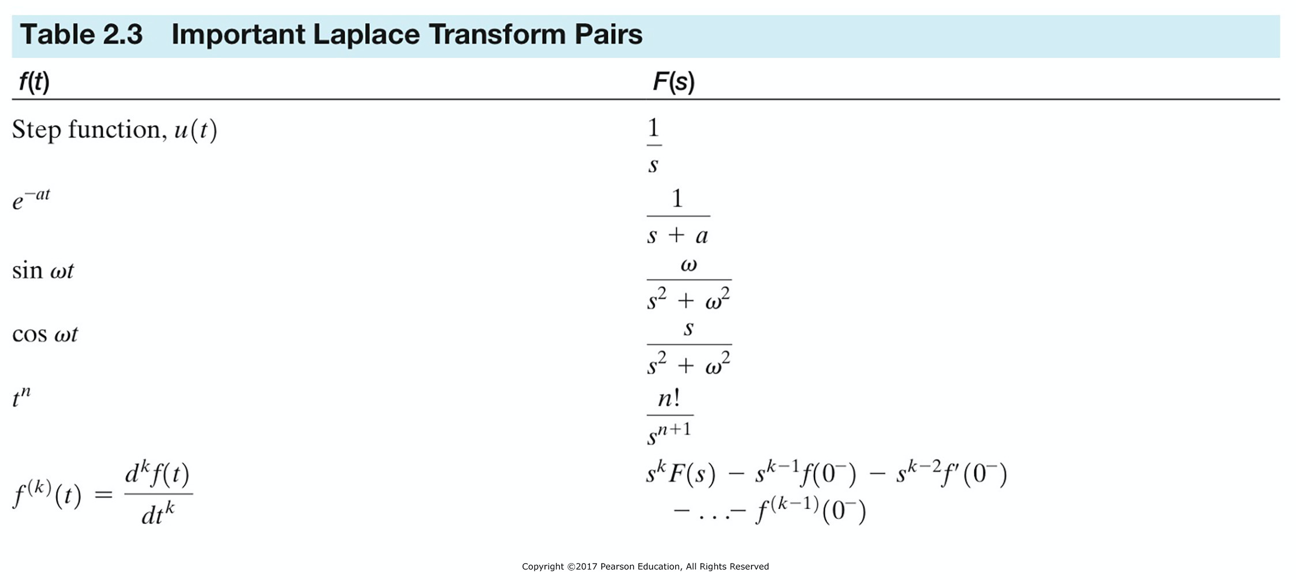

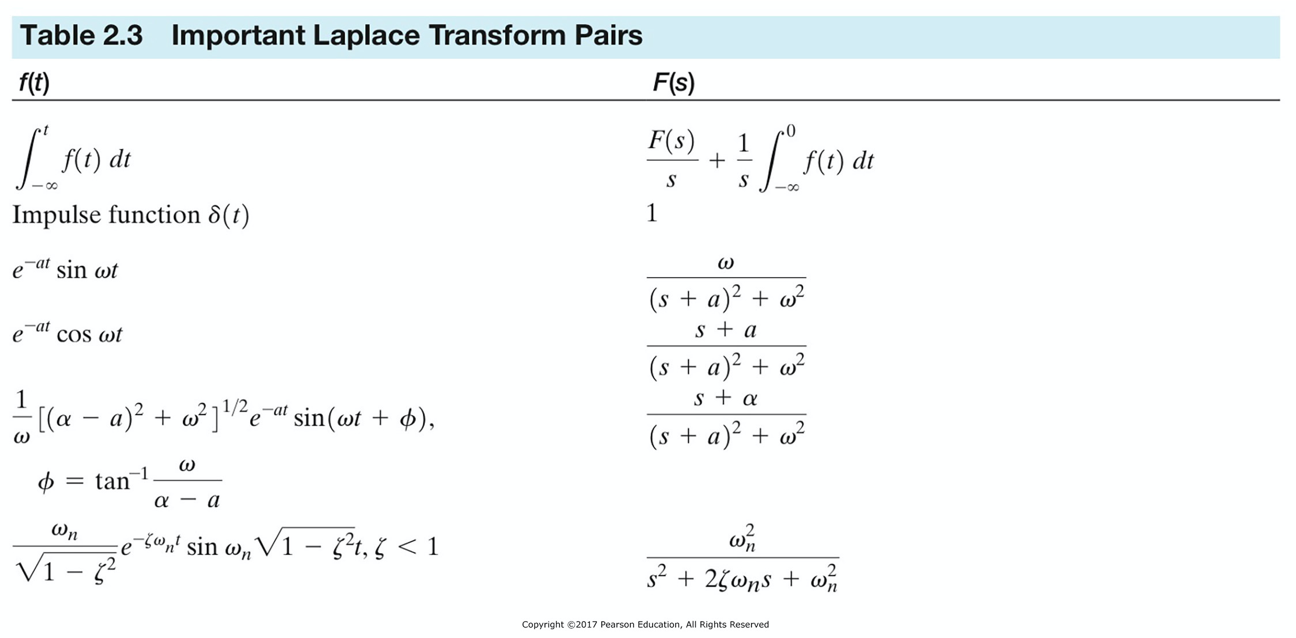

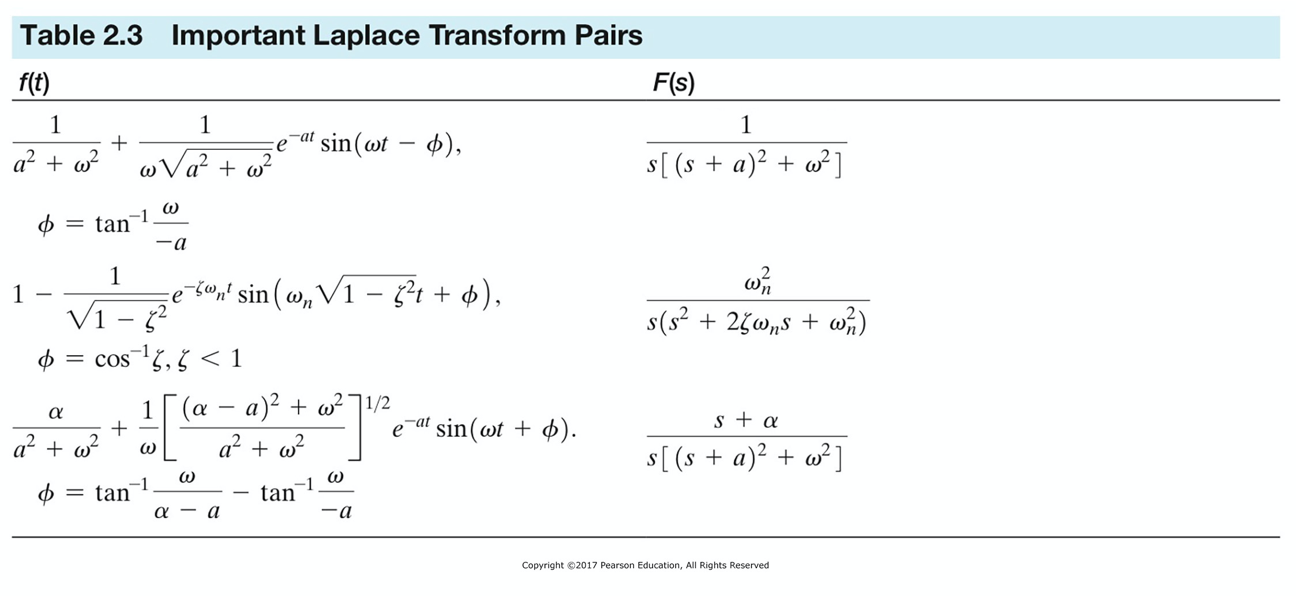

In [23]:
# We can use Sympy to do symbolic Laplace transforms (like the Matlab symbolic toolbox)

# Need to define variables as symbolic for sympy to use them. 
x, y, s, t, omega = symbols("x, y, s, t, omega", real = True)

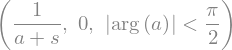

In [18]:
sym.laplace_transform(sym.exp(-a*t),t, s)

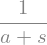

In [34]:
# Let's pull out the important part:
sym.laplace_transform(sym.exp(-a*t),t, s)[0]

In [29]:
sym.inverse_laplace_transform(omega/(omega**2+s**2),s,t)

$\theta(t)$ represents the step function, more formally known as the Heaviside function.

$s$ also acts as a differantiator in the Laplace domain. 

Multiplying the Laplace transform of a function by $s$ is equivalent to taking the time derivative, then taking the Laplace transform. 

In [40]:
sym.laplace_transform(t**2,t,s)[0]*s

In [41]:
sym.laplace_transform(sym.diff(t**2,t),t,s)[0]

Consider the equation

$M \frac{d^{2} y(t)}{d t^{2}}+b \frac{d y(t)}{d t}+k y(t)=r(t)$

The Laplace Transform is:

$M\left(s^{2} Y(s)-s y\left(0^{-}\right)-\frac{d y}{d t}\left(0^{-}\right)\right)+b\left(s Y(s)-y\left(0^{-}\right)\right)+k Y(s)=R(s)$

When
$$
r(t)=0, \quad \text { and } \quad y\left(0^{-}\right)=y_{0}, \quad \text { and }\left.\quad \frac{d y}{d t}\right|_{t=0^{-}}=0
$$
we have
$$
M s^{2} Y(s)-M s y_{0}+b s Y(s)-b y_{0}+k Y(s)=0
$$
Solving for $Y(s),$ we obtain
$$
Y(s)=\frac{(M s+b) y_{0}}{M s^{2}+b s+k}=\frac{p(s)}{q(s)}
$$

The denominator is called *the characteristic equation* because the roots determine the character of time response. The roots of the denominator are called *poles*.

The roots of the numerator are called *zeros*. 

Plotting their values on the complex plan illustrates the character of the transient response. 

Consider a specific case $k/M=2$, $b/M=3$. Then:

$Y(s)=\frac{(s+3) y_{0}}{(s+1)(s+2)}$

The poles are at $-1$ and $-2$, while the zero is at $-3$. 

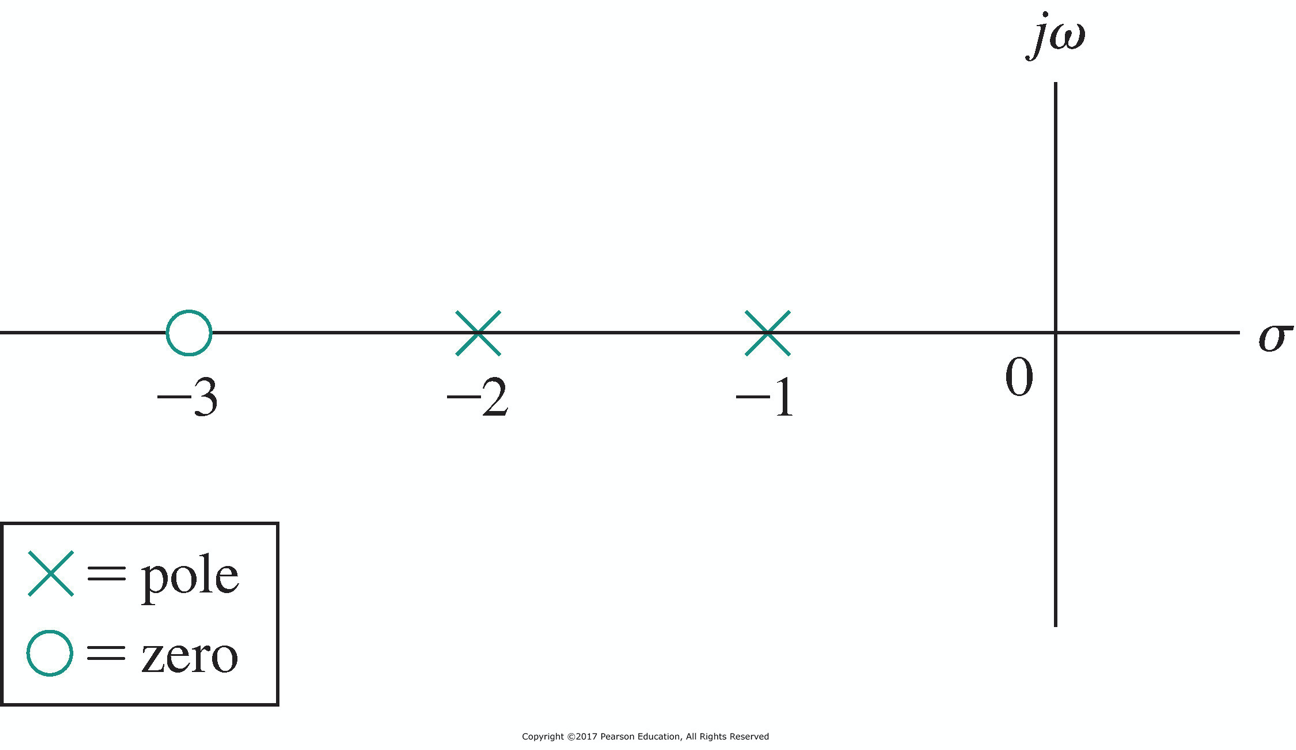

We can expand this using partial fractions. What that means is the denominator is reduced to a single pole for a summation of terms (there are other forms, this is the one we are choosing). 

As such, 

$$
Y(s)=\frac{k_{1}}{s+1}+\frac{k_{2}}{s+2}
$$

$k_1$ and $k_2$ are called the residues

The text shows a method of solving for $k_i$.  

$Y(s) = \frac{(s+3) y_{0}}{(s+1)(s+2)}= \frac{k_{1}}{s+1}+\frac{k_{2}}{s+2}$

Multiplying both sides by the denominator under $k_1$:

$$\frac{(s+1)(s+3) y_{0}}{(s+1)(s+2)}= k_{1}+\frac{k_{2}(s+1)}{s+2}$$

Now, simplifying:

$$\frac{(s+3) y_{0}}{(s+2)}= k_{1}+\frac{k_{2}(s+1)}{s+2}$$

Then setting $s=s_1 = -1$

$$\frac{(-1+3) y_{0}}{(-1+2)}= k_{1}+\frac{k_{2}(0)}{s+2}$$

and simplifying

$$\frac{(2) y_{0}}{1}= k_{1}$$

so $k_1=2 y_0$. 


Alternatively, this can be done graphically. For $y_0=1$

$$
\begin{aligned}
k_{1} &=\left.\frac{\left(s-s_{1}\right) p(s)}{q(s)}\right|_{s=s_{1}} \\
&=\left.\frac{(s+1)(s+3)}{(s+1)(s+2)}\right|_{s_{1}=-1}=2
\end{aligned}
$$

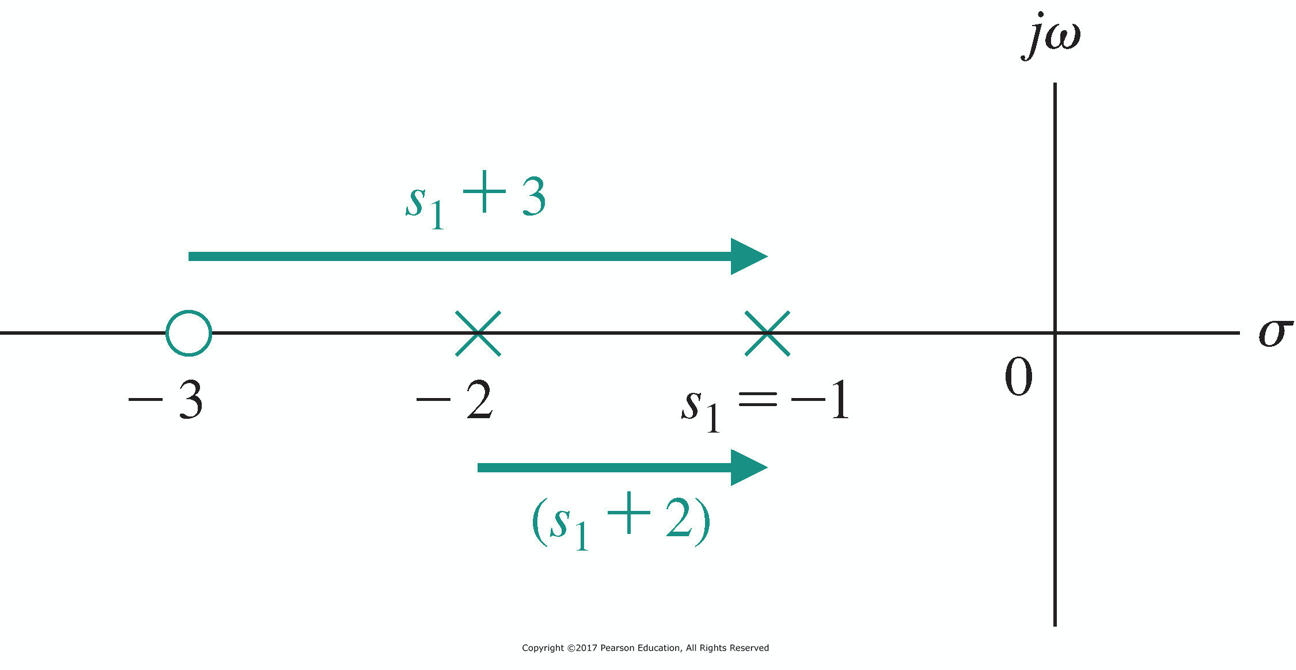

Taking the inverse Laplace transform:


In [62]:
y_soln = sym.inverse_laplace_transform(2/(s+1) + -1/(s+2),s,t)
y_soln

Traditionally, we want this multiplied out, and we don't bother keeping the Heaviside function in the result (as we know the answer doesn't exist for $t<0$.

In [67]:
sym.expand(sym.expand(y_soln)/sym.Heaviside(t))

Often, we would like to determine the final value as $t\to\infty$. For that we use the final value theorem:

$\lim _{t \rightarrow \infty} y(t)=\lim _{s \rightarrow 0} s Y(s)$

which yield zero for this case.

An alternative form of the Laplace domain solution  is:

$$
Y(s)=\frac{(s+b / M) y_{0}}{s^{2}+(b / M) s+k / M}=\frac{\left(s+2 \zeta \omega_{n}\right) y_{0}}{s^{2}+2 \zeta \omega_{n} s+\omega_{n}^{2}}
$$

The roots of the characteristic equation are:
$$
s_{1}, s_{2}=-\zeta \omega_{n} \pm \omega_{n} \sqrt{\zeta^{2}-1}
$$

When $\zeta>1$ the system is overdamped. When $\zeta< 1$ it is underdamped. $\zeta = 1$ is criticaly damped. It's also a mathematical construct. the real world isn't linear, and evaluation isn't perfect. So this case isn't a real case to be concerned about in engineering. It's only a threshold. 

When $\zeta< 1$ we prefer to write:

$s_{1,2}=-\zeta \omega_{n} \pm j \omega_{n} \sqrt{1-\zeta^{2}}$

This situation is common in mechanical engineering in vibration, and in electrical engineering in radio where the *Quality Factor* $Q=\frac{1}{2\zeta}$ describes the resonant sensitivity of an antenna couple with is associated electronics at a tuned frequency. 

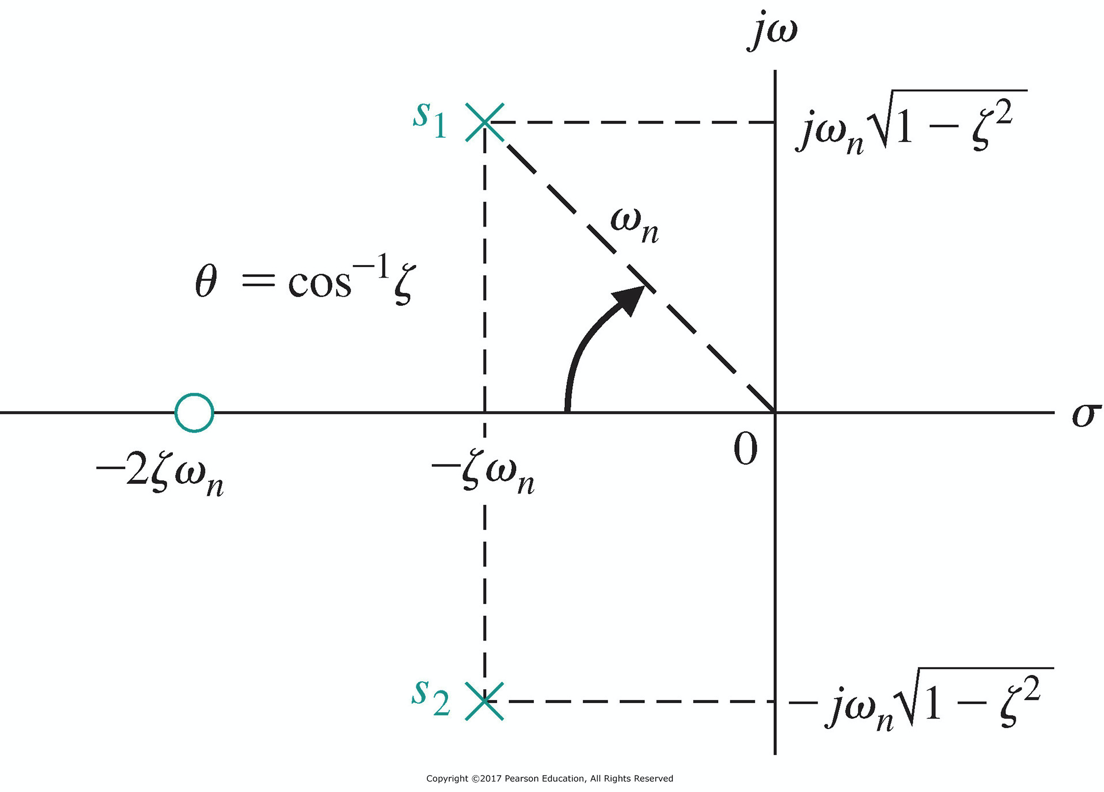

As the damping (energy dissipation) coefficient changes, the poles move on a circle in the complex plane:
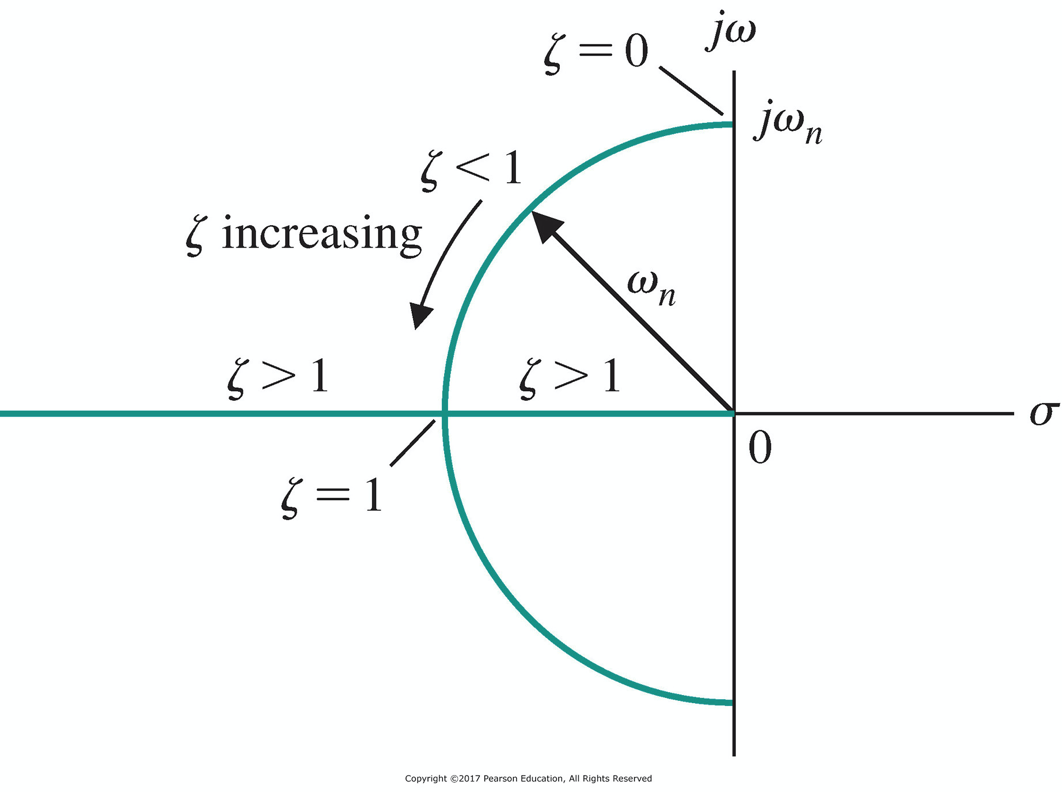

The evaluation for the residues now results in some insight. Recall 

$$
Y(s)=\frac{k_{1}}{s-s_1}+\frac{k_{2}}{s-s_2}
$$

Since $Y(s)$ is real, and $s_2$ is the conjugate of $s_1$, we write $s_2=\hat{s}_1$ so

$$
Y(s)=\frac{k_{1}}{s-s_{1}}+\frac{\hat{k}_{1}}{s-\hat{s}_{1}}
$$

solving for $k_1$
$$
k_{1}=\frac{y_{0}\left(s_{1}+2 \zeta \omega_{n}\right)}{s_{1}-\hat{s}_{1}}=\frac{y_{0} M_{1} e^{j \theta}}{M_{2} e^{j \pi / 2}}
$$

Here $M_1$ is the magnitude of $s_1+2\zeta\omega_n$ and $M_2$ is the magnitude of $s_1-\hat{s}_1$. 

$M_1 = \sqrt{  (\zeta \omega_{n})^2 +   (\omega_{n} \sqrt{1-\zeta^{2}})^2                           }=\omega_n$

$$M_2 = 2 \omega_{n} \sqrt{1-\zeta^{2}}$$ 

which is just twice the imaginary part of $s_1$

So: 

$$k_1 = \frac{y_{0} \omega_n e^{j \theta}}{2 \omega_{n} \sqrt{1-\zeta^{2}} e^{j \pi / 2} = \frac{y_{0}}{2 \sqrt{1-\zeta^{2}} e^{j(\pi / 2-\theta)}}$$

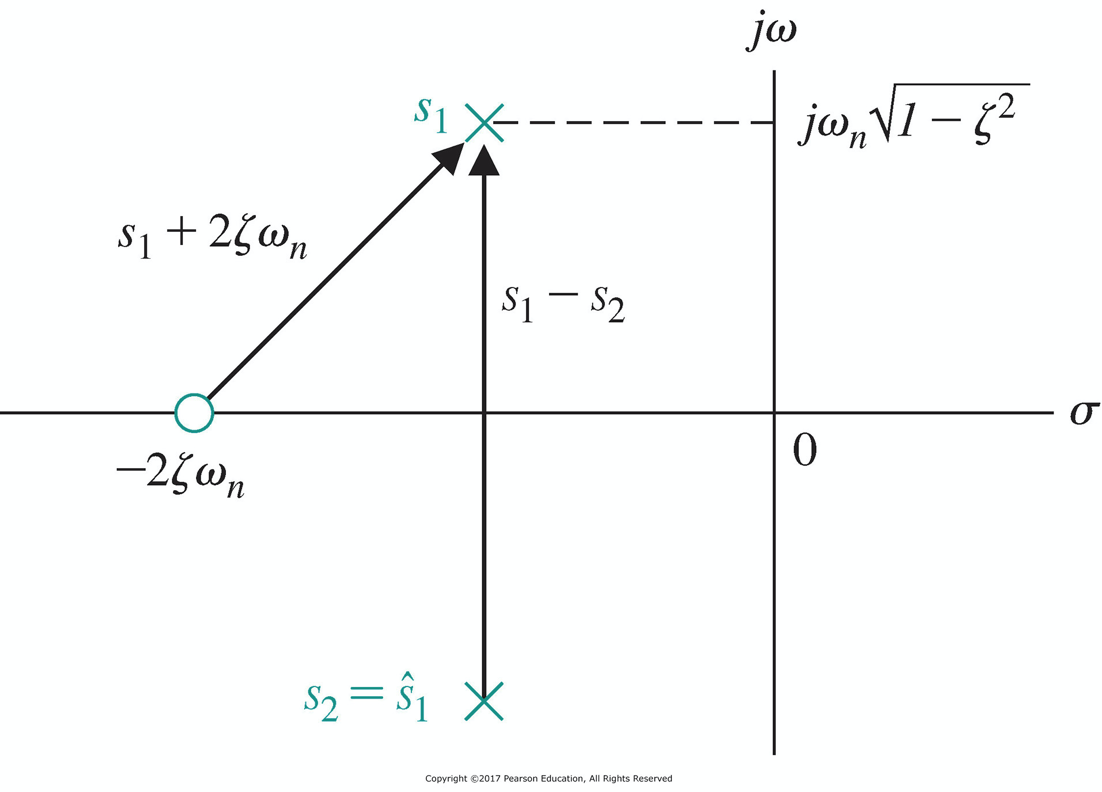

where $\theta = \cos^{-1}\zeta$ so

$$
k_{2}=\frac{y_{0}}{2 \sqrt{1-\zeta^{2}}} e^{j(\pi / 2-\theta)}
$$
Letting $\beta=\sqrt{1-\zeta^{2}},$ we find that
$$
\begin{aligned}
y(t) &=k_{1} e^{s_{1} t}+k_{2} e^{s_{2} t} \\
&=\frac{y_{0}}{2 \sqrt{1-\zeta^{2}}}\left(e^{j(\theta-\pi / 2)} e^{-\zeta \omega_{n} t} e^{j \omega_{n} \beta t}+e^{j(\pi / 2-\theta)} e^{-\zeta \omega_{n} t} e^{-j \omega_{n} \beta t}\right) \\
&=\frac{y_{0}}{\sqrt{1-\zeta^{2}}} e^{-\zeta \omega_{n} t} \sin \left(\omega_{n} \sqrt{1-\zeta^{2}} t+\theta\right)
\end{aligned}
$$

## The Transfer Function of Linear Systems